# Student Performance Indicator


### Life Cycle of Machine Learning Project

* Understanding the Problem Statement
* Data Collection
* Data Checks to performm
* Exploratory Data Analysis
* Data Pre-Preocessing
* Model Training
* Choose the best Model

### 1. Problem Statement

* This project understands how the student's performance (test scores) is affected by other variables such as Gender, Race, Test Preparation, etc

### 2. Data Collection
* Dataset Source: https://www.kaggle.com/datasets/jagdishchavan/student-performance
* The Dataset consists of 8 columns and 1000 rows.

In [6]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3. Data Checks to perform

* Check Missing Values
* Check Duplicates
* Check Data Type
* Check the number of unique values of each column
* Check the statistics of Dataset
* Check various categories present in the different categorical column

In [7]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64



#### No Missing Values Found

In [8]:
df.duplicated().sum()

0

#### There are no duplicates in this dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [14]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### **Insight**

* From above description of the neumerical data, all means are quite close to each other.(between 66 and 69)
* All standard deviations are also close.(between 14 and 15.2)
* While there is a minimum score 0 for Math, for Writing it is higher (10) and for reading much higher (17).

In [18]:
print("Categories in Gender feature:  ", end=" ")
print(df['gender'].unique())

print("\n Categories in Race feature:  ", end=" ")
print(df['race/ethnicity'].unique())

print("\n Categories in Parental level of education feature:  ", end=" ")
print(df['parental level of education'].unique())

print("\n Categories in Lunch feature:  ", end=" ")
print(df['lunch'].unique())

print("\n Categories in test preparation course feature:  ", end=" ")
print(df['test preparation course'].unique())

Categories in Gender feature:   ['female' 'male']

 Categories in Race feature:   ['group B' 'group C' 'group A' 'group D' 'group E']

 Categories in Parental level of education feature:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

 Categories in Lunch feature:   ['standard' 'free/reduced']

 Categories in test preparation course feature:   ['none' 'completed']


In [24]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f"We have {len(numerical_features)} numerical features: {numerical_features}")
print(f"\nWe have {len(categorical_features)} categorical features: {categorical_features}")

We have 3 numerical features: ['math score', 'reading score', 'writing score']

We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [27]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [29]:
# Getting total and Avg score
df['total_score'] = df['math score'] + df['writing score'] + df['reading score']
df['average'] = df['total_score'] / 3

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [30]:
full_reading = df[df['reading score'] == 100]['average'].count()
full_writing = df[df['writing score'] == 100]['average'].count()
full_math = df[df['math score'] == 100]['average'].count()

print(f"Number of students with full marks in Maths: {full_math}")
print(f"Number of students with full marks in Reading: {full_reading}")
print(f"Number of students with full marks in Writing: {full_writing}")

Number of students with full marks in Maths: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14


In [31]:
less_reading = df[df['reading score'] <= 20]['average'].count()
less_writing = df[df['writing score'] <= 20]['average'].count()
less_math = df[df['math score'] <= 20]['average'].count()

print(f"Number of students with less than 20 marks in Maths: {less_math}")
print(f"Number of students with less than 20 marks in Reading: {less_reading}")
print(f"Number of students with less than 20 marks in Writing: {less_writing}")

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Reading: 1
Number of students with less than 20 marks in Writing: 3


#### **Insights**
* Students performed worst in Maths
* Best performance of students was in Reading

### 4. Exploring the Data

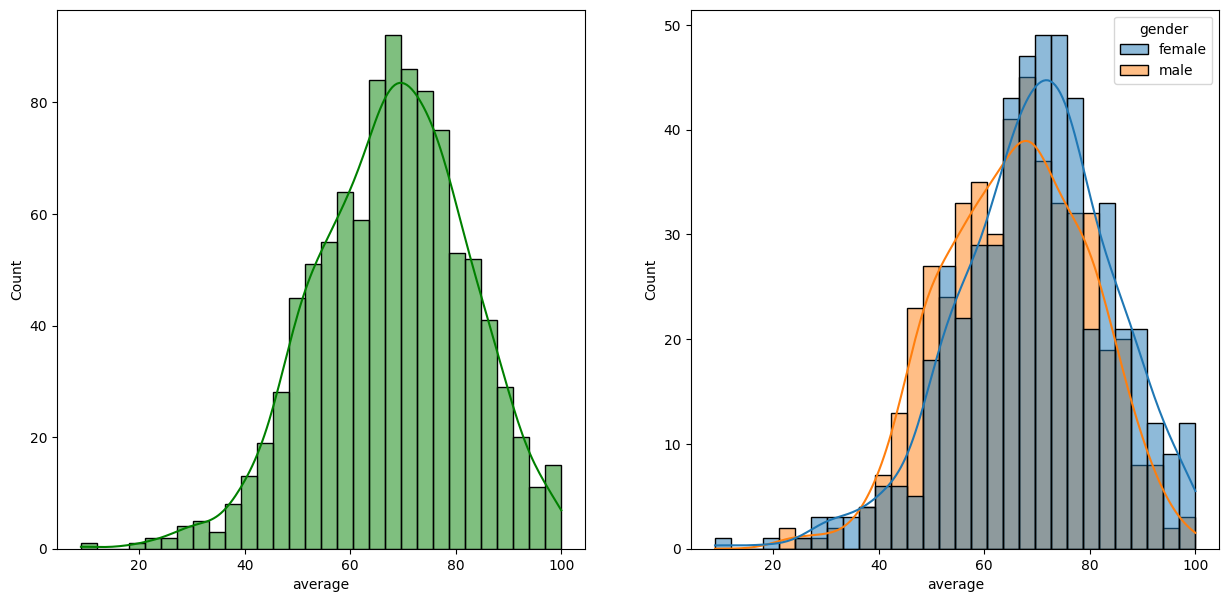

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

plt.subplot(121)
sns.histplot(x='average', data=df, bins=30, kde=True, color='g')

plt.subplot(122)
sns.histplot(x='average', data=df, bins=30, kde=True, hue='gender')

plt.show()

#### **Insights**
* Female students tend to perform well then male students

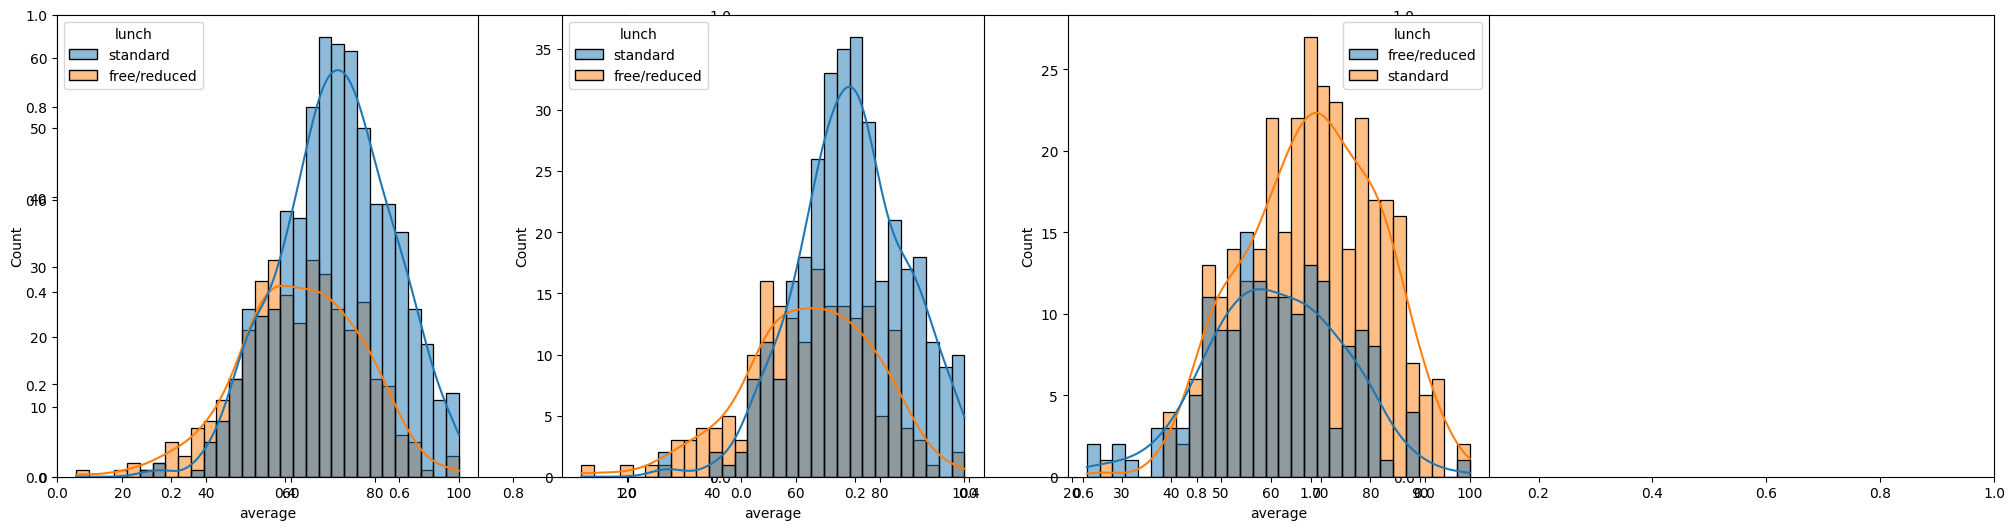

In [50]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

plt.subplot(141)
sns.histplot(x='average', data=df, bins=30, kde=True, hue='lunch')

plt.subplot(142)
sns.histplot(x='average', data=df[df.gender == 'female'], bins=30, kde=True, hue='lunch')

plt.subplot(143)
sns.histplot(x='average', data=df[df.gender == 'male'], bins=30, kde=True, hue='lunch')

plt.show()

#### **Insights**
* Standard lunch helps to perform well in exams for all gender